In [1]:
import pandas as pd # data frame library
import seaborn as sns # data visialization library
import matplotlib.pyplot as plt
import numpy

In [2]:
df = pd.read_csv('heart failure.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [10]:
df = df.rename({'DEATH_EVENT':'death'},axis=1)

In [11]:
x = df.drop('death',axis=1)

In [12]:
y = df['death']

In [7]:
from sklearn.model_selection import train_test_split

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.70,random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
dt = DecisionTreeClassifier()

In [14]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [15]:
pred = dt.predict(xtest)

In [16]:
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [17]:
import numpy as np
np.array(ytest)

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [18]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [19]:
classification_report(ytest,pred) 

'              precision    recall  f1-score   support\n\n           0       0.68      0.77      0.73        53\n           1       0.60      0.49      0.54        37\n\n    accuracy                           0.66        90\n   macro avg       0.64      0.63      0.63        90\nweighted avg       0.65      0.66      0.65        90\n'

In [20]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.68      0.77      0.73        53
           1       0.60      0.49      0.54        37

    accuracy                           0.66        90
   macro avg       0.64      0.63      0.63        90
weighted avg       0.65      0.66      0.65        90



In [27]:
test_confusion_matrix = confusion_matrix(ytest,pred)

In [22]:
test_confusion_matrix

array([[41, 12],
       [19, 18]], dtype=int64)

<AxesSubplot:>

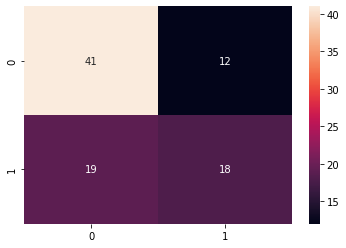

In [23]:
sns.heatmap(test_confusion_matrix, annot=True)

In [24]:
tp, fn, fp, tn = confusion_matrix(ytest,pred).reshape(-1)

In [26]:
dt.score(xtest,ytest)

0.6555555555555556

# Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
clf = RandomForestClassifier()

In [30]:
clf.fit(xtrain, ytrain)

RandomForestClassifier()

In [31]:
clf.score(xtest, ytest)

0.7777777777777778

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
n_estimators = [int(x) for x in numpy.linspace(start=15, stop=200, num=20)]
n_estimators

[15,
 24,
 34,
 44,
 53,
 63,
 73,
 83,
 92,
 102,
 112,
 122,
 131,
 141,
 151,
 161,
 170,
 180,
 190,
 200]

In [36]:
#Assign Parameters
n_estimators = numpy.random.randint(15,200,40)
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt', 'log2']
max_depth = numpy.random.randint(1,10,20)
min_samples_split = numpy.random.randint(1,10,15)
min_samples_leaf= numpy.random.randint(1,4,15)  

parameters = {
    'n_estimators'  : n_estimators,
    'criterion' : criterion,
    'max_features': max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [37]:
random_forest = RandomForestClassifier()

In [38]:
r = RandomizedSearchCV(random_forest , parameters, n_iter = 300, cv = 3) 

In [41]:
import warnings
warnings.filterwarnings('ignore')
r.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=300,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([4, 7, 5, 4, 7, 1, 8, 1, 2, 9, 6, 7, 2, 1, 7, 7, 5, 9, 5, 4]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([1, 1, 3, 3, 2, 3, 1, 1, 3, 3, 3, 2, 1, 3, 3]),
                                        'min_samples_split': array([1, 6, 3, 3, 6, 5, 5, 6, 1, 1, 7, 5, 1, 3, 7]),
                                        'n_estimators': array([151,  57,  71, 127,  90,  42, 192,  40, 116, 165, 142, 114,  78,
        80,  71,  38, 167,  26,  95,  59,  30,  93, 113, 100,  98, 160,
        87, 182, 176, 181, 158, 126,  99, 127, 168, 100, 167,  33, 190,
       173])})

In [42]:
r.cv_results_

{'mean_fit_time': array([0.09936309, 0.09872349, 0.25446701, 0.18172789, 0.46304925,
        0.09240913, 0.19515785, 0.06452155, 0.3125174 , 0.42590308,
        0.0921189 , 0.46438495, 0.29304147, 0.06843297, 0.25415667,
        0.26290838, 0.36371557, 0.33906865, 0.4005065 , 0.398393  ,
        0.28284923, 0.39484008, 0.57276845, 0.11419264, 0.0865864 ,
        0.14337476, 0.20845294, 0.61566615, 0.26829489, 0.2062819 ,
        0.28044367, 0.10142978, 0.23412673, 0.27174505, 0.11417993,
        0.25425251, 0.07458321, 0.08021665, 0.0822444 , 0.46617977,
        0.19605557, 0.14777327, 0.30571747, 0.2244997 , 0.15069056,
        0.43761627, 0.41364733, 0.33896343, 0.3590254 , 0.22587363,
        0.44970719, 0.09269301, 0.06793412, 0.28241984, 0.18606838,
        0.19938461, 0.06368518, 0.22967211, 0.46010351, 0.04048109,
        0.14290071, 0.24482338, 0.27114677, 0.24451335, 0.04311713,
        0.07137815, 0.05733013, 0.04828731, 0.35201414, 0.25891058,
        0.15099438, 0.10807673,

In [43]:
result = pd.DataFrame(r.cv_results_)

In [44]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.099363,0.012138,0.000000,0.000000,114,1,1,auto,2,entropy,"{'n_estimators': 114, 'min_samples_split': 1, ...",NaN,NaN,NaN,NaN,NaN,227
1,0.098723,0.002500,0.010415,0.007364,40,6,3,log2,7,entropy,"{'n_estimators': 40, 'min_samples_split': 6, '...",0.828571,0.942857,0.855072,0.875500,0.048842,65
2,0.254467,0.024343,0.022847,0.005270,93,3,3,log2,2,entropy,"{'n_estimators': 93, 'min_samples_split': 3, '...",0.785714,0.900000,0.826087,0.837267,0.047322,169
3,0.181728,0.008161,0.018651,0.006011,71,6,1,sqrt,6,entropy,"{'n_estimators': 71, 'min_samples_split': 6, '...",0.842857,0.957143,0.840580,0.880193,0.054420,47
4,0.463049,0.007715,0.043108,0.006944,192,6,2,auto,5,gini,"{'n_estimators': 192, 'min_samples_split': 6, ...",0.842857,0.928571,0.855072,0.875500,0.037857,65


In [45]:
r.best_score_

0.8993788819875776

In [46]:
new_r = r.best_estimator_

In [47]:
new_r

RandomForestClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=126)

In [48]:
new_r.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=126)

In [50]:
new_r.score(xtest, ytest)

0.7555555555555555

# Grid Search CV

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = { 
    'n_estimators': [15, 200, 40],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5,6,7],
    'criterion' :['gini', 'entropy'],
}

In [53]:
rf_1 = RandomForestClassifier()

In [54]:
rf_1

RandomForestClassifier()

In [55]:
rf_2 = GridSearchCV(rf_1, param_grid, cv = 3)

In [56]:
rf_2

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [15, 200, 40]})

In [57]:
import warnings
warnings.filterwarnings('ignore')
rf_2.fit(xtrain, ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [15, 200, 40]})

In [58]:
result = pd.DataFrame(rf_2.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.041415,0.009109,0.006810,0.005136,gini,2,auto,15,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.828571,0.942857,0.753623,0.841684,0.077809,94
1,0.546944,0.045817,0.051248,0.010254,gini,2,auto,200,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.800000,0.900000,0.840580,0.846860,0.041066,85
2,0.112358,0.007358,0.011642,0.001890,gini,2,auto,40,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.771429,0.928571,0.840580,0.846860,0.064307,85
3,0.033987,0.004970,0.012831,0.008537,gini,2,sqrt,15,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.771429,0.957143,0.753623,0.827398,0.092031,102
4,0.512860,0.013458,0.039638,0.000746,gini,2,sqrt,200,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.828571,0.914286,0.855072,0.865977,0.035832,39


In [59]:
rf_2.best_score_

0.8850931677018633

In [60]:
new_rf_2 = rf_2.best_estimator_ 
new_rf_2

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       n_estimators=40)

In [61]:
new_rf_2.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       n_estimators=40)

In [62]:
new_rf_2.score(xtest, ytest)

0.7777777777777778

In [ ]:
Decision_Tree = "Decision Tree"
Random_Forest = "Random Forest"
RandomizedSearchCV = "Random Forest using RandomizedSearchCV"
Random_Forest_using_GridSearchCV = " Random Forest using GridSearchCV"
df=pd.DataFrame([[Decision_Tree,0.7111111111111111],[Random_Forest, 0.7777777777777778],  [RandomizedSearchCV, 0.7777777777777778], [Random_Forest_using_GridSearchCV, 0.7666666666666667]],
                 columns=['Accuracy', 'Value'])